In [8]:
# https://github.com/Ekeany/Boruta-Shap
from BorutaShap import BorutaShap
from IPython.core.display import display
from src.utils.get_data import import_data

In [9]:
DATA_PATH = "../../data"

In [10]:
X_tr, y_tr = import_data(DATA_PATH, segmentation_type='no',
                         drop_user_features=False,
                         drop_expert=True)

X_tr.reset_index(drop=True)

FeatureSelector = BorutaShap(model=None, # Random Forest
                             importance_measure='shap',
                             classification=True)

X_tr.reset_index(drop=True, inplace=True)
y_tr.reset_index(drop=True, inplace=True)

100%|██████████| 100/100 [27:20<00:00, 16.40s/it]


9 attributes confirmed important: ['Spectral_Slope', 'PSD_225-425', 'Age', 'MFCC_mean0', 'MFCC_std5', 'MFCC_mean6', 'MFCC_mean10', 'MFCC_mean8', 'MFCC_std0']
61 attributes confirmed unimportant: ['MFCC_mean1', 'EEPD400_450', 'PSD_1325-1600', 'PSD_2500-2900', 'EEPD850_900', 'MFCC_std11', 'EEPD200_250', 'MFCC_std8', 'MFCC_std3', 'MFCC_mean3', 'Resp_Condition', 'MFCC_std7', 'PSD_1600-2000', 'EEPD350_400', 'Spectral_Rolloff', 'Spectral_StDev', 'RMS_Power', 'MFCC_std6', 'Spectral_Kurtosis', 'Symptoms', 'Spectral_Centroid', 'PSD_3100-3700', 'MFCC_std12', 'EEPD600_650', 'EEPD800_850', 'EEPD450_500', 'MFCC_std4', 'EEPD300_350', 'MFCC_std9', 'Spectral_Spread', 'Dominant_Freq', 'EEPD550_600', 'EEPD250_300', 'MFCC_mean2', 'EEPD150_200', 'MFCC_mean12', 'MFCC_std1', 'Gender', 'EEPD650_700', 'MFCC_std10', 'EEPD700_750', 'MFCC_std2', 'PSD_450-550', 'Crest_Factor', 'EEPD50_100', 'MFCC_mean9', 'Spectral_Flatness', 'MFCC_mean5', 'MFCC_mean7', 'Zero_Crossing_Rate', 'SNR', 'Spectral_Decrease', 'EEPD750_80

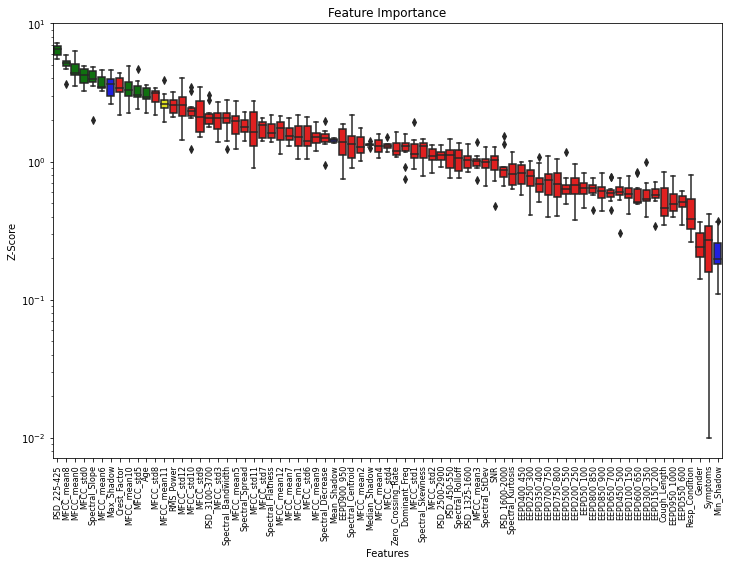

In [11]:
FeatureSelector.fit(X=X_tr, y=y_tr['Label'], n_trials=100, sample=False,
                    train_or_test='test', normalize=True,
                    verbose=True)

# Returns Boxplot of features
FeatureSelector.plot(which_features='all')

In [12]:
X_tr_subset = FeatureSelector.Subset()
display(X_tr_subset)

,Spectral_Slope,PSD_225-425,Age,MFCC_mean0,MFCC_std5,MFCC_mean6,MFCC_mean10,MFCC_mean8,MFCC_std0
0,-0.003971,0.274024,28.000000,-467.153198,18.215382,-12.063636,-10.122878,-5.335185,181.040543
1,-0.006269,0.102350,44.000000,-468.048279,8.234312,-8.765696,-6.090876,-8.449532,210.750732
2,-0.006256,0.302548,37.000000,-417.940735,12.611152,-22.456423,-7.077998,-6.483564,188.853958
3,-0.005564,0.273720,34.321509,-445.803070,13.549204,-21.246662,-8.166676,-9.860546,228.613403
4,-0.011231,0.334480,16.000000,-315.878784,20.681267,-32.707638,-6.555464,-11.907177,166.447693
...,...,...,...,...,...,...,...,...,...
1654,-0.004138,0.298201,29.000000,-479.022736,7.235129,-12.926356,-6.696254,-10.436719,182.322769
1655,-0.004742,0.019402,49.000000,-437.248291,16.886332,-13.467618,-6.479060,-10.063935,215.632095
1656,-0.003796,0.276205,38.000000,-546.409424,12.094812,-9.585182,-3.000142,-1.410657,150.820663
1657,-0.006606,0.112508,34.321509,-385.100830,8.967196,-13.182168,-13.525775,-10.303716,247.056473
